In [2]:
# Instalaciones
# !pip install matplotlib
# !pip install seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys
from src import soporte
import json
from tqdm import tqdm
warnings.filterwarnings("ignore")

In [3]:
#Leemos CSVs
df_precios = pd.read_csv("CSVs/df_precios.csv")
df_productos = pd.read_csv("CSVs/df_productos.csv")
df_supermercados = pd.read_csv("CSVs/df_supermercados.csv")

El análisis comienza analizando la variación de precios de los productos scrapeados de la web de FACUA usando las librerías BeautifulSoup y Selenium.

El análisis de los últimos dos meses nos devuelve ciertas proposiciones claras: El producto que más ha variado de media en todos los supermercados es sin duda el aceite de girasol, mientras que el aceite de oliva ha bajado su precio, en promedio. La leche ha aumentado tímidamente (Gráfico 1). Es difícil encontrar correlación entre los cambios de los diferentes productos sin emplear métodos cuantitativos.

Advertencia: No se encontró un color para la categoría 'leche'. Usando azul por defecto.


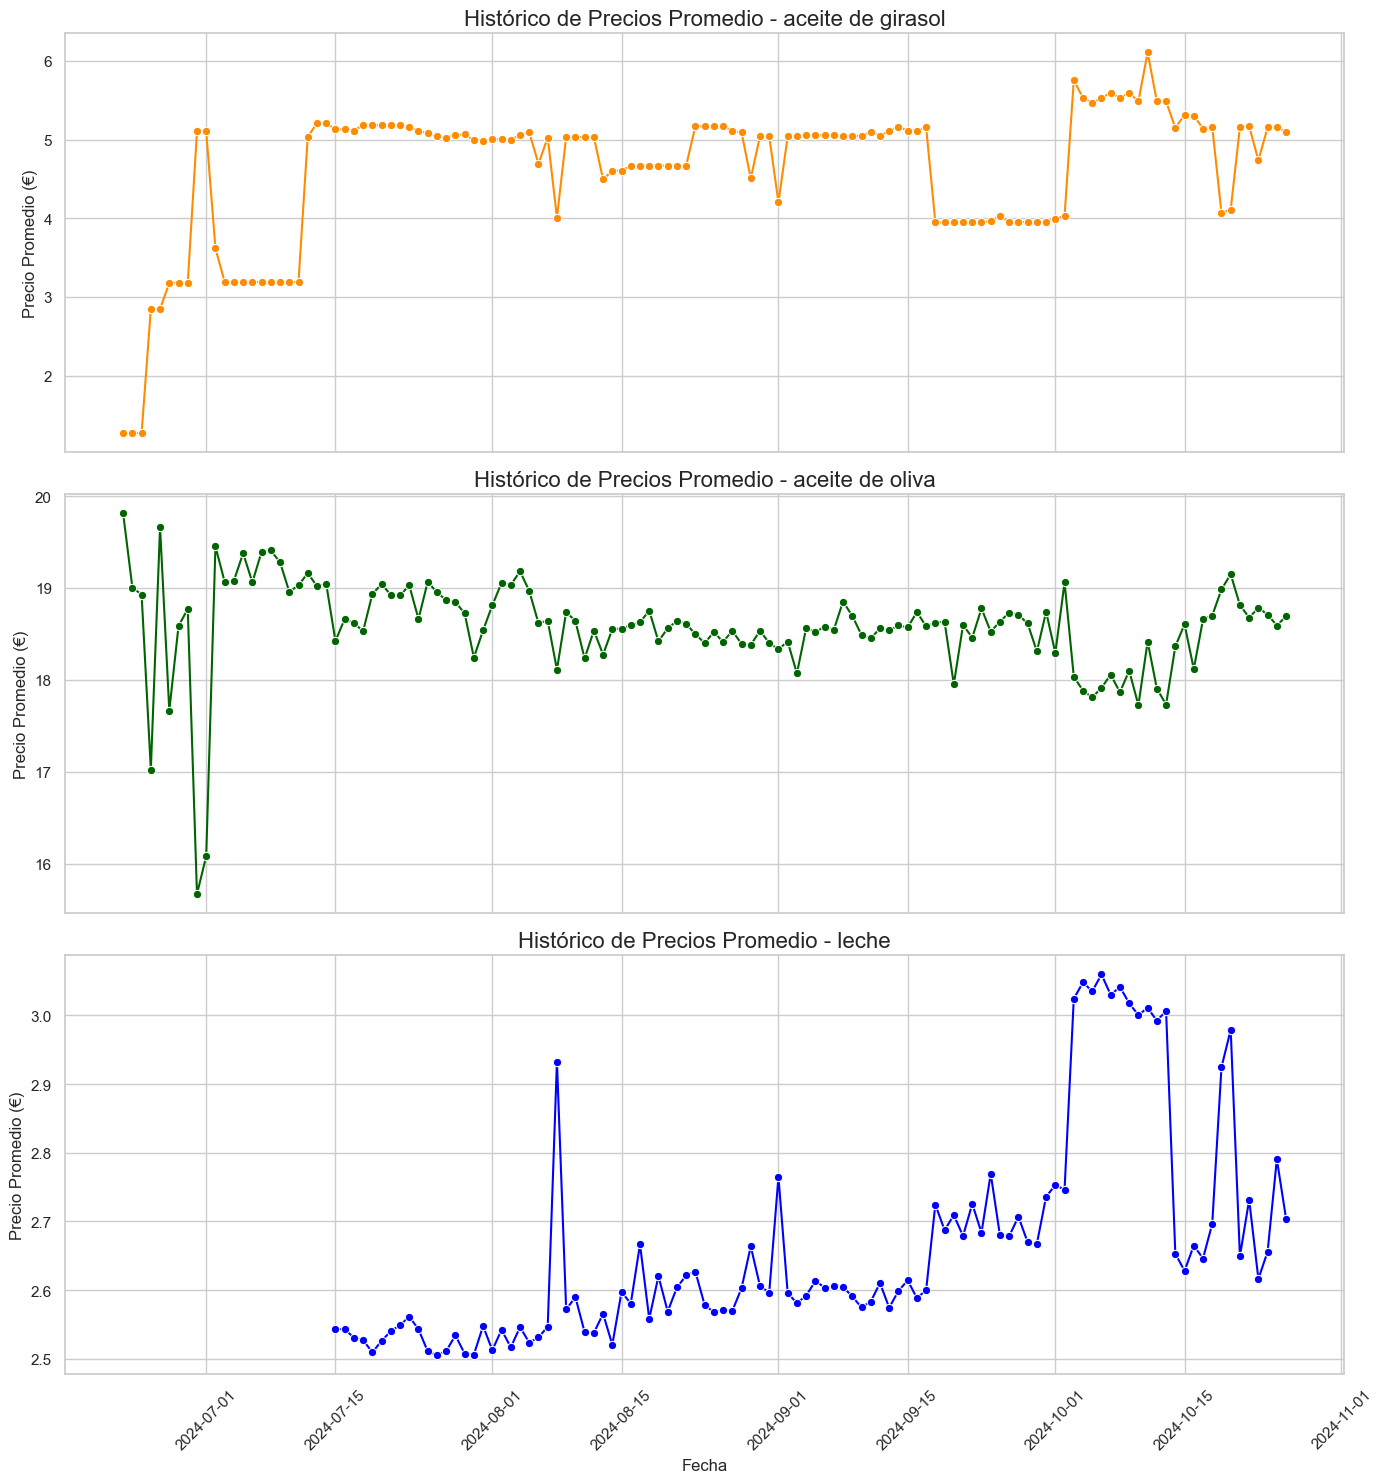

In [4]:
#Gráfico 1: Histórico promedio
# Configurar el estilo
sns.set_theme(style="whitegrid")

# Asegurarse de que la columna 'Fecha' esté en formato de fecha
df_precios['Fecha'] = pd.to_datetime(df_precios['Fecha'])

# Agrupar por fecha y categoría, y calcular la media de los precios
df_media_precios = df_precios.groupby(['Fecha', 'Categoría'])['Precio'].mean().reset_index()

# Crear un conjunto de subplots, uno por cada categoría
categorias = df_media_precios['Categoría'].unique()
n_categorias = len(categorias)

# Crear la figura y los ejes
fig, axes = plt.subplots(n_categorias, 1, figsize=(14, 5 * n_categorias), sharex=True)

# Definir colores para cada categoría
colores = {
    'aceite de girasol': 'darkorange',
    'aceite de oliva': 'darkgreen'
}

# Asegurarse de que los ejes se muestren correctamente
for i, categoria in enumerate(categorias):
    # Filtrar los datos para la categoría actual
    df_categoria = df_media_precios[df_media_precios['Categoría'] == categoria]
    
    # Obtener el color correspondiente; si la categoría no está en el diccionario, lanzar un aviso
    color = colores.get(categoria)
    if color is None:
        print(f"Advertencia: No se encontró un color para la categoría '{categoria}'. Usando azul por defecto.")
        color = 'blue'  # color de respaldo en caso de que la categoría no esté definida

    # Crear el lineplot para la categoría actual con el color correspondiente
    sns.lineplot(data=df_categoria, x='Fecha', y='Precio', marker='o', ax=axes[i], color=color)
    
    # Configurar el título y etiquetas
    axes[i].set_title(f'Histórico de Precios Promedio - {categoria}', fontsize=16)
    axes[i].set_ylabel('Precio Promedio (€)')
    
    # Añadir cuadrícula
    axes[i].grid(True)

# Ajustar el eje x para todos los subplots
axes[-1].set_xlabel('Fecha')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor visibilidad
plt.tight_layout()

# Mostrar el gráfico
plt.show()


A la hora de analizar los productos por supermercado, observamos que Alcampo e Hipercor se posicionan como las firmas más variadas, mientras que Día o Mercadona abordan el mercado desde otro ámbito diferente a la variedad (Gráfico 2, Query 1). En este caso día se posiciona como competidor en precio, siendo sus precios promedio de los más bajos del mercado (Gráficos 6 y 7), y entendiendo el contexto de mercadona, podemos suponer que se posiciona como una alternativa de calidad con marcas seleccionadas (Query 2).

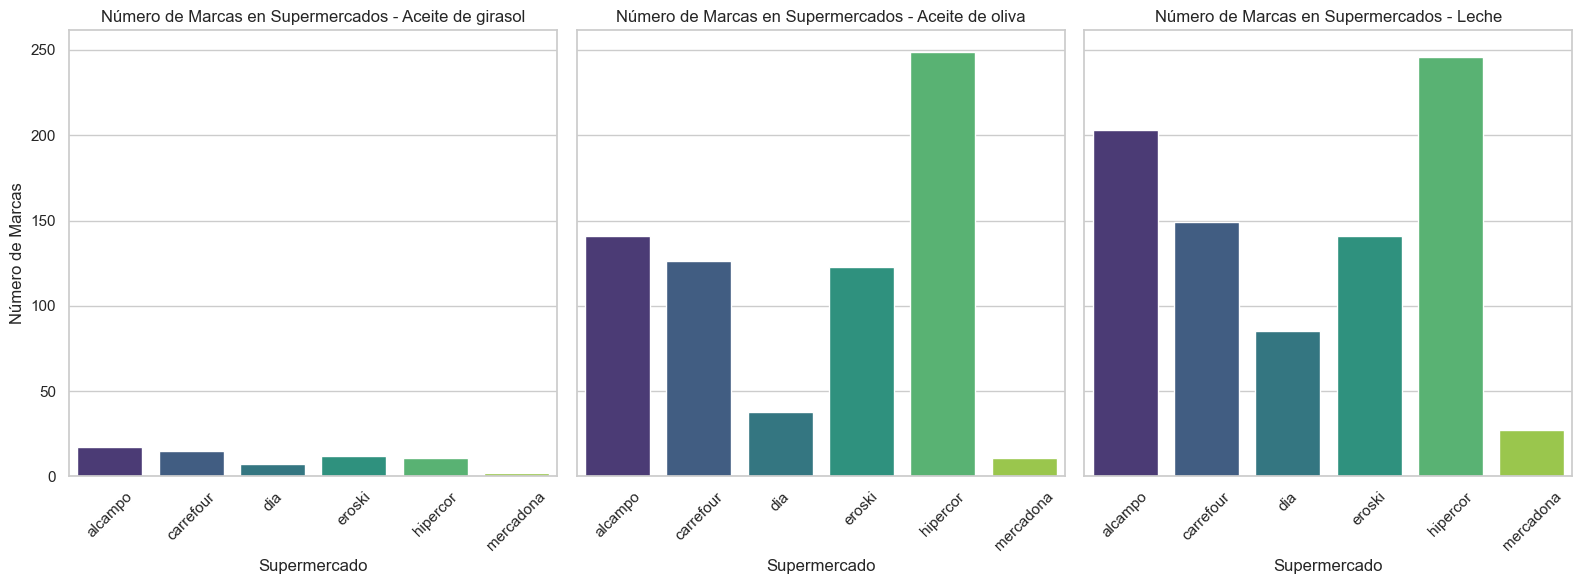

In [5]:
# Gráfico 2: Count de marcas por supermercado
# Configuración del estilo de visualización
sns.set_theme(style="whitegrid")

# Contar el número de productos únicos por supermercado y categoría
df_counts = df_precios.groupby(['Supermercado', 'Categoría'])['Nombre_producto'].nunique().reset_index()
df_counts.rename(columns={'Nombre_producto': 'Num_marcas'}, inplace=True)

# Lista de categorías únicas en el DataFrame
categorias = df_counts['Categoría'].unique()

# Crear la figura y los subplots
fig, axes = plt.subplots(1, len(categorias), figsize=(16, 6), sharey=True)

for i, categoria in enumerate(categorias):
    # Filtrar el DataFrame para la categoría actual
    df_categoria = df_counts[df_counts['Categoría'] == categoria]
    
    # Crear el countplot para la categoría actual
    sns.barplot(data=df_categoria, x='Supermercado', y='Num_marcas', ax=axes[i], palette='viridis')
    axes[i].set_title(f'Número de Marcas en Supermercados - {categoria.capitalize()}')
    axes[i].set_xlabel('Supermercado')
    axes[i].set_ylabel('Número de Marcas' if i == 0 else "")  # Mostrar ylabel solo en el primer subplot
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [6]:
#Query1
df_precios.groupby("Categoría")["Supermercado"].value_counts()

Categoría          Supermercado
aceite de girasol  alcampo          1646
                   carrefour        1302
                   eroski           1264
                   hipercor         1018
                   dia               701
                   mercadona         214
aceite de oliva    hipercor        21060
                   alcampo         13233
                   eroski           9870
                   carrefour        9352
                   dia              3845
                   mercadona        1391
leche              hipercor        19104
                   alcampo         18122
                   eroski          13661
                   dia              9484
                   carrefour        7707
                   mercadona        2893
Name: count, dtype: int64

In [7]:
#Query2
df_precios.groupby(["Categoría","Supermercado"])["Nombre_producto"].describe()

count unique  \
Categoría         Supermercado                 
aceite de girasol alcampo        1646     17   
                  carrefour      1302     15   
                  dia             701      7   
                  eroski         1264     12   
                  hipercor       1018     11   
                  mercadona       214      2   
aceite de oliva   alcampo       13233    141   
                  carrefour      9352    126   
                  dia            3845     38   
                  eroski         9870    123   
                  hipercor      21060    249   
                  mercadona      1391     11   
leche             alcampo       18122    203   
                  carrefour      7707    149   
                  dia            9484     85   
                  eroski        13661    141   
                  hipercor      19104    246   
                  mercadona      2893     27   

                                                                              top  \
Categoría         Supermercado                                                      
aceite de girasol alcampo               koipesol aceite de girasol botella de 1 l   
                  carrefour                        aceite de girasol fontasol 5 l   
                  dia                        aceite de girasol coosol garrafa 5 l   
                  eroski                aceite alto oleico eroski botella 1 litro   
                  hipercor       koipe sol aceite refinado de girasol botella 1 l   
                  mercadona           aceite de girasol refinado 02 hacendado 1 l   
aceite de oliva   alcampo          carbonell aceite de oliva suave garrafa de 5 l   
                  carrefour        aceite de oliva intenso 1 la masia garrafa 5 l   
                  dia               aceite de oliva intenso carbonell botella 1 l   
                  eroski             aceite de oliva 04 carbonell botella 1 litro   
                  hipercor      aceite de oliva virgen extra picual casa junca...   
                  mercadona                          aceite de oliva 04 hacendado   
leche             alcampo       celta leche semidesnatada de vaca con bienesta...   
                  carrefour     leche desnatada central lechera asturiana brik...   
                  dia           bebida lactea omega 3 sin lactosa puleva brik 1 l   
                  eroski        leche desnatada 0 sin lactosa m g asturiana br...   
                  hipercor                        asturiana leche entera brik 1 l   
                  mercadona         leche semidesnatada sin lactosa hacendado 1 l   

                               freq  
Categoría         Supermercado       
aceite de girasol alcampo       127  
                  carrefour      90  
                  dia           107  
                  eroski        106  
                  hipercor       94  
                  mercadona     107  
aceite de oliva   alcampo       250  
                  carrefour     110  
                  dia           110  
                  eroski        124  
                  hipercor      121  
                  mercadona     127  
leche             alcampo       208  
                  carrefour     172  
                  dia           208  
                  eroski        104  
                  hipercor       93  
                  mercadona     208

A la hora de analizar cada producto por supermercado, si bien la media del Aceite de Oliva es cercana entre las diversas marcas, encontramos outliers muy por encima de la distribución general, lo que nos sugiere que existen productos premium o con muy alto valor añadido dentro de la categoría. Una zambullida en los datos nos demuestra que los productos más caros son las garrafas de aceite, que por cantidad naturalmente son outliers (Query3). Algo similar pasa con el aceite de Girasol y la Leche, los productos más caros son aquellos que ofrecen producto en gran cantidad. 

En paralelo, encontramos que carrefour que claramente le saca más rédito al aceite de girasol, y que mayor de distribución de precios tiene. En parte se puede justificar por la enorme variedad de producto que tiene (Query 1). También es el que tiene productos lácteos más caros, aunque de media se encuentra en la parte baja de los supermercados (Gráficos 4 y 5).

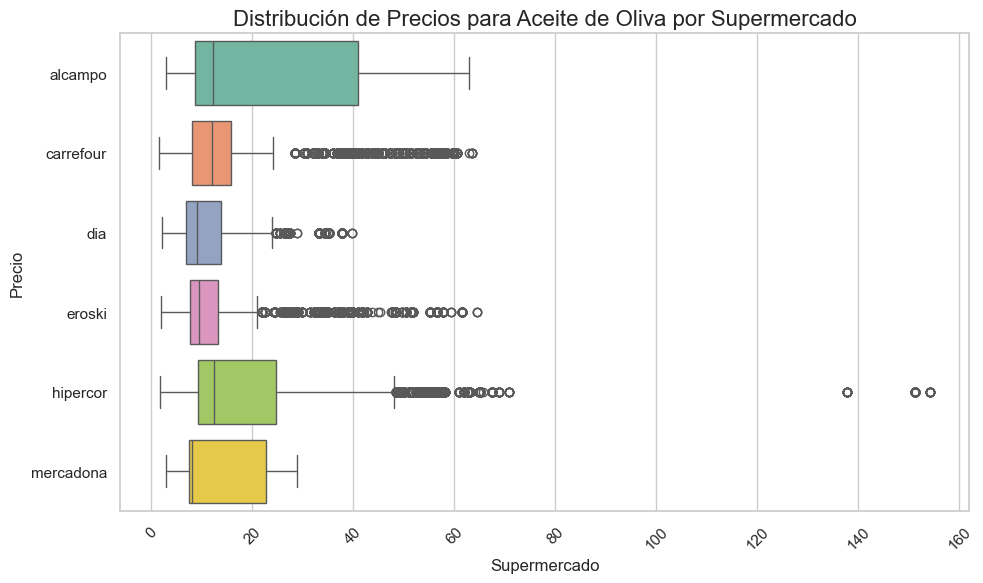

In [8]:
# Gráfico 3: Boxplot AO
sns.set_theme(style="whitegrid")

# Filtrar el dataframe solo para "Aceite de Girasol"
df_aceite = df_precios[df_precios['Categoría'] == 'aceite de oliva']

# Asegurarse de que no haya valores NaN o infinitos en la columna 'Precio'
df_aceite = df_aceite.dropna(subset=['Precio'])  # Eliminar filas con NaN en 'Precio'
df_aceite = df_aceite[~df_aceite['Precio'].isin([float('inf'), float('-inf')])]  # Eliminar infinitos

# Verificar si hay datos después del filtrado
if df_aceite.empty:
    print("No hay datos disponibles para la categoría 'Aceite de Oliva'.")
else:
    # Crear la figura
    plt.figure(figsize=(10, 6))
    plt.title('Distribución de Precios para Aceite de Oliva por Supermercado', fontsize=16)

    # Crear el boxplot
    sns.boxplot(
        data=df_aceite,
        y='Supermercado',
        x='Precio',
        palette='Set2'
    )
    
    # Etiquetas
    plt.xlabel('Supermercado')
    plt.ylabel('Precio')
    plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad
    plt.tight_layout()
    plt.show()

In [9]:
# Query 3
df_ordenado = df_precios.sort_values(by=['Categoría', 'Precio'], ascending=False).groupby(['Categoría', 'Supermercado'])[['Nombre_producto', 'Precio']].apply(list).reset_index(name='Productos_ordenados')

# Filtrar el DataFrame para la categoría "aceite de oliva"
df_filtrado = df_precios[df_precios["Categoría"] == "aceite de oliva"][["Supermercado", "Nombre_producto", "Precio"]]

df_filtrado


,Supermercado,Nombre_producto,Precio
1646,alcampo,aceite de oliva virgen extra procedente aceitu...,57.13
1647,alcampo,aceite de oliva virgen extra procedente aceitu...,57.13
1648,alcampo,aceite de oliva virgen extra procedente aceitu...,57.13
1649,alcampo,aceite de oliva virgen extra procedente aceitu...,57.13
1650,alcampo,aceite de oliva virgen extra procedente aceitu...,57.13
...,...,...,...
132969,mercadona,aceite de oliva virgen hacendado garrafa 3 l,22.50
132970,mercadona,aceite de oliva virgen hacendado garrafa 3 l,22.50
132971,mercadona,aceite de oliva virgen hacendado garrafa 3 l,22.50
132972,mercadona,aceite de oliva virgen hacendado garrafa 3 l,22.50


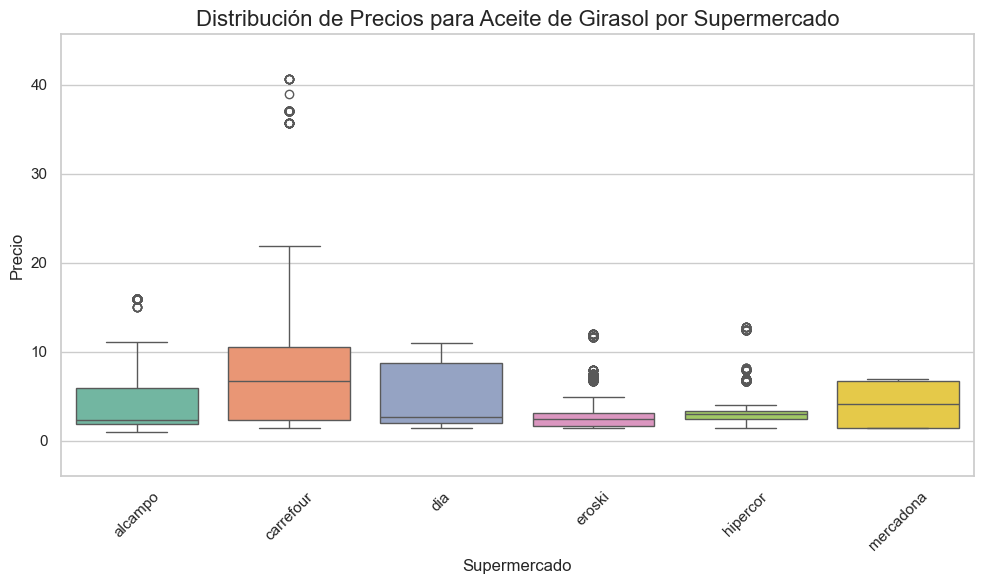

In [10]:
#Gráfico 4: Boxplot AG

# Configurar el estilo
sns.set_theme(style="whitegrid")

# Filtrar el dataframe solo para "Aceite de Girasol"
df_aceite = df_precios[df_precios['Categoría'] == 'aceite de girasol']

# Asegurarse de que no haya valores NaN o infinitos en la columna 'Precio'
df_aceite = df_aceite.dropna(subset=['Precio'])  # Eliminar filas con NaN en 'Precio'
df_aceite = df_aceite[~df_aceite['Precio'].isin([float('inf'), float('-inf')])]  # Eliminar infinitos

# Verificar si hay datos después del filtrado
if df_aceite.empty:
    print("No hay datos disponibles para la categoría 'Aceite de Girasol'.")
else:
    # Crear la figura
    plt.figure(figsize=(10, 6))
    plt.title('Distribución de Precios para Aceite de Girasol por Supermercado', fontsize=16)

    # Crear el boxplot
    sns.boxplot(
        data=df_aceite,
        y='Supermercado',
        x='Precio',
        palette='Set2'
    )



    # Etiquetas
    plt.xlabel('Supermercado')
    plt.ylabel('Precio')
    plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad
    plt.tight_layout()
    plt.show()


In [11]:
# Query 4
df_ordenado = df_precios.sort_values(by=['Categoría', 'Precio'], ascending=False).groupby(['Categoría', 'Supermercado'])[['Nombre_producto', 'Precio']].apply(list).reset_index(name='Productos_ordenados')

# Filtrar el DataFrame para la categoría "aceite de oliva"
df_filtrado = df_precios[df_precios["Categoría"] == "aceite de girasol"][["Supermercado", "Nombre_producto", "Precio"]]

df_filtrado


,Supermercado,Nombre_producto,Precio
0,alcampo,campomar nature aceite de girasol ecologico ca...,5.88
1,alcampo,campomar nature aceite de girasol ecologico ca...,5.88
2,alcampo,campomar nature aceite de girasol ecologico ca...,5.88
3,alcampo,campomar nature aceite de girasol ecologico ca...,5.88
4,alcampo,campomar nature aceite de girasol ecologico ca...,5.88
...,...,...,...
131578,mercadona,aceite de girasol refinado 02 hacendado 5 l,6.91
131579,mercadona,aceite de girasol refinado 02 hacendado 5 l,6.91
131580,mercadona,aceite de girasol refinado 02 hacendado 5 l,6.91
131581,mercadona,aceite de girasol refinado 02 hacendado 5 l,6.91


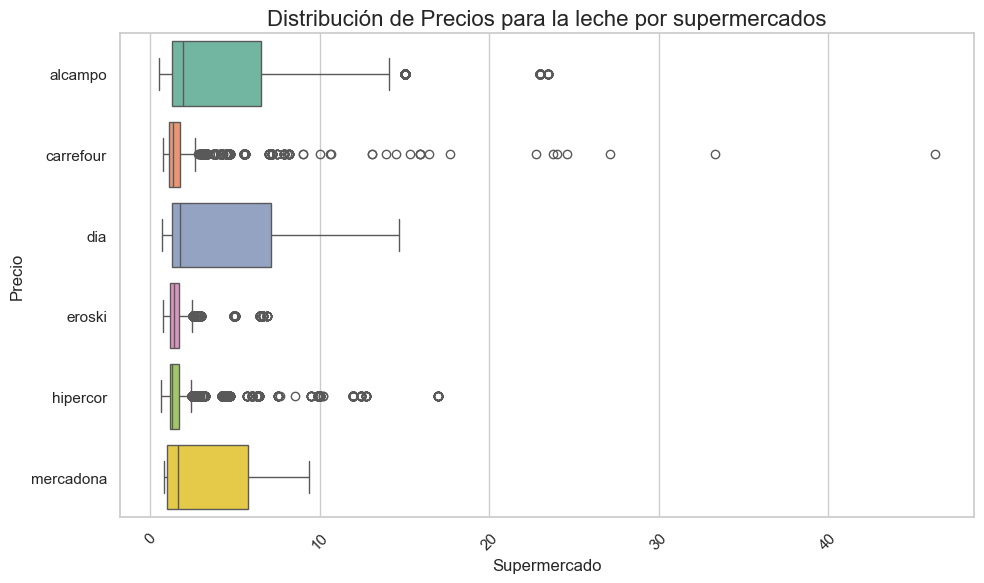

In [17]:
#Gráfico 5: Boxplot leche
# Configurar el estilo
sns.set_theme(style="whitegrid")

# Filtrar el dataframe solo para "Aceite de Girasol"
df_aceite = df_precios[df_precios['Categoría'] == 'leche']

# Asegurarse de que no haya valores NaN o infinitos en la columna 'Precio'
df_aceite = df_aceite.dropna(subset=['Precio'])  # Eliminar filas con NaN en 'Precio'
df_aceite = df_aceite[~df_aceite['Precio'].isin([float('inf'), float('-inf')])]  # Eliminar infinitos

# Verificar si hay datos después del filtrado
if df_aceite.empty:
    print("No hay datos disponibles para la categoría 'leche'.")
else:
    # Crear la figura
    plt.figure(figsize=(10, 6))
    plt.title('Distribución de Precios para la leche por supermercados', fontsize=16)

    # Crear el boxplot
    sns.boxplot(
        data=df_aceite,
        y='Supermercado',
        x='Precio',
        palette='Set2'
    )



    # Etiquetas
    plt.xlabel('Supermercado')
    plt.ylabel('Precio')
    plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad
    plt.tight_layout()
    plt.show()


In [21]:
# Query 5
df_ordenado = df_precios.sort_values(by=['Categoría', 'Precio'], ascending=False).groupby(['Categoría', 'Supermercado'])[['Nombre_producto', 'Precio']].apply(list).reset_index(name='Productos_ordenados')

# Filtrar el DataFrame para la categoría "aceite de oliva"
df_filtrado = df_precios[df_precios["Categoría"] == "leche"][["Supermercado", "Nombre_producto", "Precio"]]

df_filtrado


,Supermercado,Nombre_producto,Precio
14879,alcampo,alcampo cultivamos lo bueno leche de vaca desn...,0.95
14880,alcampo,alcampo cultivamos lo bueno leche de vaca desn...,0.95
14881,alcampo,alcampo cultivamos lo bueno leche de vaca desn...,0.95
14882,alcampo,alcampo cultivamos lo bueno leche de vaca desn...,0.95
14883,alcampo,alcampo cultivamos lo bueno leche de vaca desn...,0.95
...,...,...,...
135862,mercadona,leche semidesnatada sin lactosa hacendado 9 l,9.36
135863,mercadona,leche semidesnatada sin lactosa hacendado 9 l,9.36
135864,mercadona,leche semidesnatada sin lactosa hacendado 9 l,9.36
135865,mercadona,leche semidesnatada sin lactosa hacendado 9 l,9.36


Por último, se han agrupado los productos por nivel de necesidad: Mientras que carrefour ha protagonizado las mayores fluctuaciones, eroski se planteo como el absoluto ganador por precios, sorprendentemente cerca de hipercor, pese a su posicionamiento premium y de variedad (Gráfico 6). En los productos más de lujo como el aceite de oliva Alcampo sorprende con los precios medios más altos, mientras que eroski sigue manteniéndose líder en precios bajos. Sorprende que los supermercados más variados (Alcampo y carrefour) tienen precios medios más altos que aquellos que se sitúan como alternativas de calidad (Mercadona)

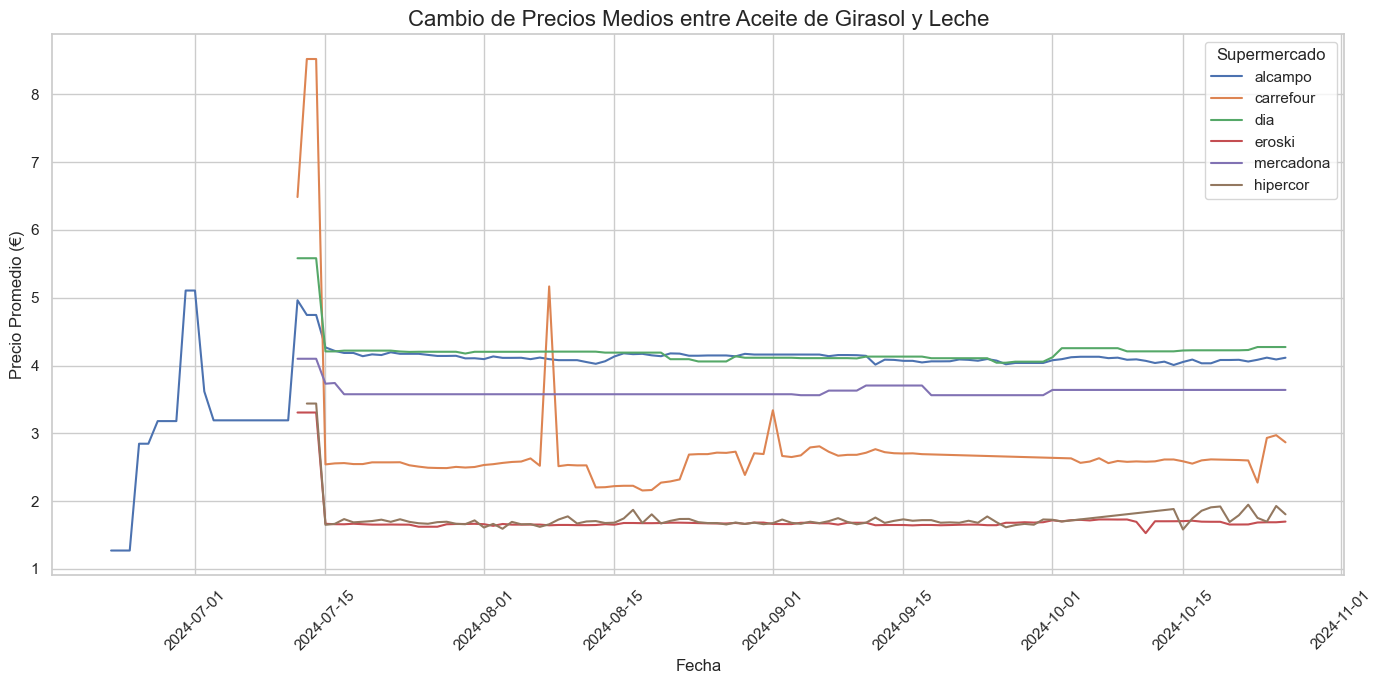

In [14]:
#Gráfico 6: Cambio productos esenciales
# Configurar el estilo
sns.set_theme(style="whitegrid")

# Asegurarse de que la columna 'Fecha' esté en formato de fecha
df_precios['Fecha'] = pd.to_datetime(df_precios['Fecha'])

# Filtrar el DataFrame para incluir solo los productos deseados
productos_deseados = ['aceite de girasol', 'leche']  # Categorías en minúsculas
df_filtrado = df_precios[df_precios['Categoría'].isin(productos_deseados)]

# Agrupar por fecha y supermercado, y calcular la media de los precios de ambas categorías
df_media_precios = df_filtrado.groupby(['Fecha', 'Supermercado'])['Precio'].mean().reset_index()

# Crear un DataFrame que contenga la media entre aceite de girasol y leche
df_media_combined = df_media_precios.groupby(['Fecha', 'Supermercado']).mean().reset_index()

# Crear el lineplot para las medias de precios a lo largo del tiempo
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_media_combined, x='Fecha', y='Precio', hue='Supermercado', markers=True, dashes=False)

# Configurar el título y etiquetas
plt.title('Cambio de Precios Medios entre Aceite de Girasol y Leche', fontsize=16)
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio (€)')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor visibilidad
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


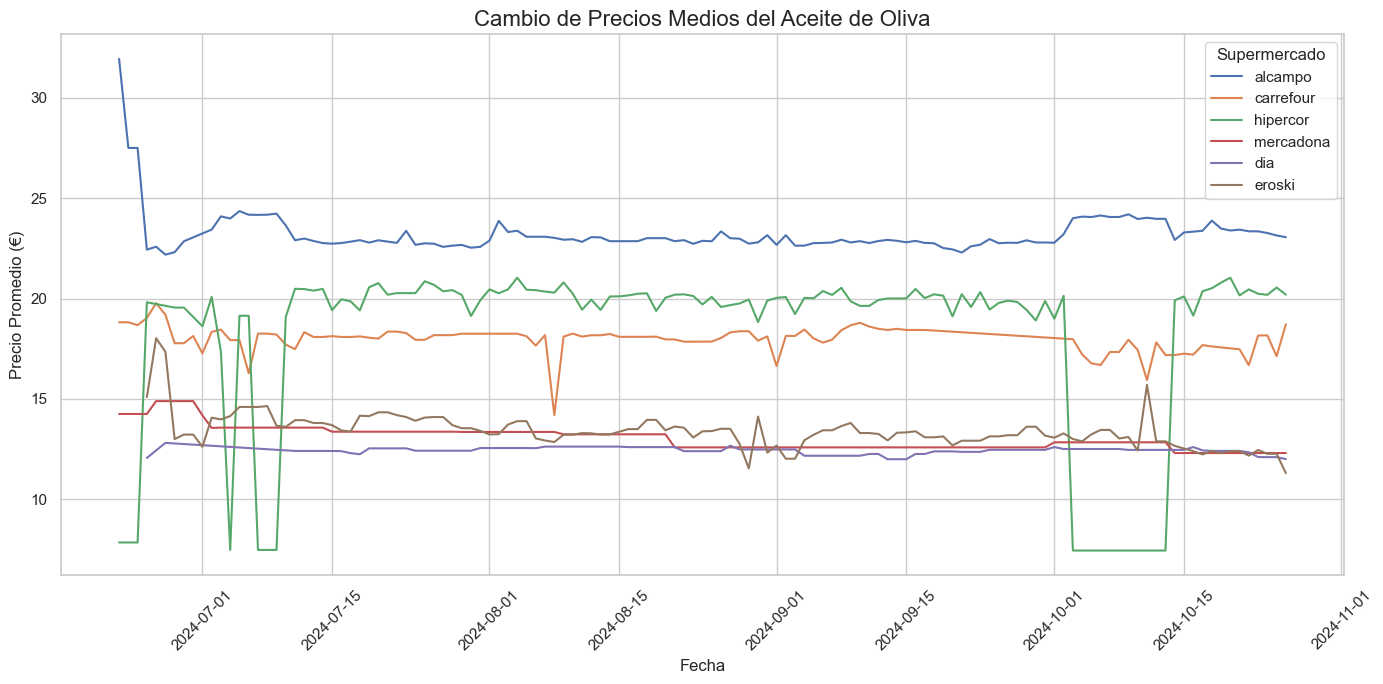

In [15]:
#Cambio AO
#Gráfico 7: Configurar el estilo
sns.set_theme(style="whitegrid")

# Asegurarse de que la columna 'Fecha' esté en formato de fecha
df_precios['Fecha'] = pd.to_datetime(df_precios['Fecha'])

# Filtrar el DataFrame para incluir solo el aceite de oliva
categoria_deseada = 'aceite de oliva'  # Categoría en minúsculas
df_filtrado = df_precios[df_precios['Categoría'] == categoria_deseada]

# Agrupar por fecha y supermercado, y calcular la media de los precios
df_media_precios = df_filtrado.groupby(['Fecha', 'Supermercado'])['Precio'].mean().reset_index()

# Crear el lineplot para las medias de precios a lo largo del tiempo
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_media_precios, x='Fecha', y='Precio', hue='Supermercado', markers=True, dashes=False)

# Configurar el título y etiquetas
plt.title('Cambio de Precios Medios del Aceite de Oliva', fontsize=16)
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio (€)')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor visibilidad
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()
